## Оглавление

[1 Лайфхаки](#lifehacks)    
[2 Визуализации](#visualization)      
[3 Best practices](#best)    
[4 Полезные ссылки](#refs)    
[5 Книги](#books)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

<a id='advices'></a>
## Быстрые советы

1. При любой категоризации данных важно смореть, какой объем данных попал в каждую категорию

2. Если делались преобразование данных, включение новых столбцов, то после этапа предобработки в конце шага можно вывести пару строк таблицы, чтобы читающие убедились в присутствии всех преобразований

3. Малую долю пропусков в реальной работе придется просто удалять, т.к. на ее обработку может не быть времени.

<a id='lifehacks'></a>
## Лайфхаки

1. Параметр --quiet в конце строки, чтобы не листать больших выводов о ходе установки. Пример:



In [3]:
!pip install folium --quiet

2. Для определения нужных столбцов еще на этапе чтения файла (если ты их знаешь) можно использовать параметр usecols в pd.read_csv

In [8]:
map_distr = pd.read_csv('https://raw.githubusercontent.com/hflabs/city/master/city.csv', usecols=['city', 'geo_lat', 'geo_lon'])
map_distr.head(3)

,city,geo_lat,geo_lon
0,Адыгейск,44.878414,39.190289
1,Майкоп,44.609827,40.100661
2,Горно-Алтайск,51.958103,85.960324


3. Для обзора датасета можно использовать различные методы и функции, чтобы как можно больше узнать о данных, например `head`, `tail`, `dtypes`, `info`, `describe`, `isna` и др

4. Если требуется изменять исходные данные, то лучше это делать путем создания нового столбца и работать далее с ним, чтобы не наделать неверных выводов

5. Столбец Unnamed: 0 в датасете указывает, что данные были сохранены с указанием индекса, чтобы он снова им стал, можно использовать параметр index_col=0

6. Метод dt.month - возвращает номер месяца в году и если у нас будут данные за несколько лет, то может случится путаница. Корректнее будет использовать дату 1 числа, например, использовать astype('datetime64[M]')

7. Значения коэффициента корреляции по модулю менее 0,25 означают, что связи между данными нет, минус при коэффициентах ничего не значит.

<a id='visualization'></a>
## Визуализации

1. Сайт с подборкой крутых примеров визуализаций на разных библиотеках:

https://python-graph-gallery.com/

2. При выводе двух гистограмм с разным масштабом на графике, чтобы  нивелировать это можно использовать плотность распределения - параметр density=True


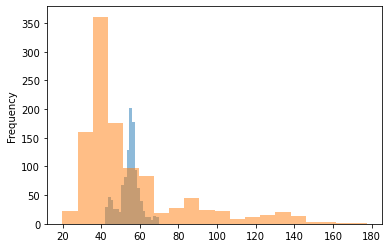

In [11]:
# без плотности
f, ax = plt.subplots()
map_distr['geo_lat'].plot(kind='hist', bins=20, ax=ax, label='geo_lat', alpha=0.5)
map_distr['geo_lon'].plot(kind='hist', bins=20, ax=ax, label='geo_lon', alpha=0.5)

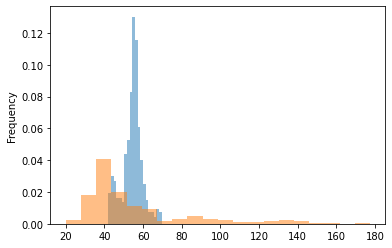

In [14]:
# density=True
f, ax = plt.subplots()
map_distr['geo_lat'].plot(kind='hist', bins=20, ax=ax, label='geo_lat', alpha=0.5, density=True)
map_distr['geo_lon'].plot(kind='hist', bins=20, ax=ax, label='geo_lon', alpha=0.5, density=True)

2. Одна из важных характеристик типа визуализации данных – то, насколько точно он позволяет раскодировать значения, записанные с помощью геометрических фигур и их свойств. Проводились исследования на эту тему. Оказалось, что точнее всего позволяют считывать значения точечная и столбиковая диаграммы. А именно – сочетание длины столбика с его расположением относительно базовой (общей) линии. Угол, в частности сектор в круговой диаграмме, считывается значительно хуже. Еще расплывчатее показывают значения разные оттенки насыщенности цвета и объемные фигуры и ...передать ощущение части и целого нужно гораздо реже, чем мы думаем. Чаще всего мы хотим сравнить компоненты целого между собой. А это круговая диаграмма делает плохо. Она предлагает нашему мозгу сравнивать либо углы секторов, либо визуальную площадь этих секторов. И то, и другое мозг делает плохо – нам гораздо проще сравнить длину столбиков.

<a id='best'></a>
## Best practices

1. Хорошее оформление включает:
* Название проекта
* Оглавление
* Вступление, включающее цель проекта
* Импорты и настройки
* Основаная часть
* Выводы



2. Принято отделять логически разный код:
* импорты библиотек
* настройки библиотек
* рабочий код

Вот что думает PEP8 по вопросу импортов:
Импортирование всегда нужно делать сразу после комментариев к модулю и строк документации, перед объявлением глобальных переменных и констант.
Группируйте импорты в следующем порядке:
- импорты стандартной библиотеки
- импорты сторонних библиотек
- импорты модулей текущего проекта
Вставляйте пустую строку между каждой группой импортов.


3. На графике всегда должны быть подписаны оси, ось Y должна содержать размерность данных (шт., млн. и т.д.). В заголовке рекомендуется указывать за какой период у нас данные.    
 Оси и заголовок должны быть на одном языке. Все графики в проекте должны быть оформлены единообразно (на одном языке)

<a id='refs'></a>
## Полезные ссылки

1. Про потенциал для эффективного изменения типов    
https://pyprog.pro/data_types.html    
https://habr.com/ru/company/ruvds/blog/442516/

2. Проблематика вложенных конструкций if-else и как "по-питонячьи" принято их решать    
https://medium.com/lemon-code/guard-clauses-3bc0cd96a2d3 

3. Оформления ноутбуков профессиональных аналитиков
https://www.kaggle.com/notebooks/

<a id='books'></a>
## Книги

1. Александр Богачев <a href="https://ru.bookmate.com/books/pfLCYNJM">Графики, которые убеждают всех</a>